1. Load Data

In [111]:
import pandas as pd

# Load Data & add types of missing values to list of NA representations
df = pd.read_csv('/Users/tida/Documents/Git/Analytics-Basics/Data/Auto.csv', na_values=['N/A', 'NA', '--', '?'])

2. Overview (Head, Info, Describe)

In [112]:
# View the first few rows of the DataFrame
print(df.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0       130.0    3504          12.0    70   
1  15.0          8         350.0       165.0    3693          11.5    70   
2  18.0          8         318.0       150.0    3436          11.0    70   
3  16.0          8         304.0       150.0    3433          12.0    70   
4  17.0          8         302.0       140.0    3449          10.5    70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [113]:
# Get information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.0+ KB


In [114]:
# Summarize the statistics of the DataFrame
print(df.describe().astype(int))

       mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
count  397        397           397         392     397           397   397   
mean    23          5           193         104    2970            15    75   
std      7          1           104          38     847             2     3   
min      9          3            68          46    1613             8    70   
25%     17          4           104          75    2223            13    73   
50%     23          4           146          93    2800            15    76   
75%     29          8           262         126    3609            17    79   
max     46          8           455         230    5140            24    82   

       origin  
count     397  
mean        1  
std         0  
min         1  
25%         1  
50%         1  
75%         2  
max         3  


2.2 Data transformation

In [115]:
# Remove Missing Values
df = df.dropna()

In [116]:
# Check df again
df.describe().astype(int)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392,392,392,392,392,392,392,392
mean,23,5,194,104,2977,15,75,1
std,7,1,104,38,849,2,3,0
min,9,3,68,46,1613,8,70,1
25%,17,4,105,75,2225,13,73,1
50%,22,4,151,93,2803,15,76,1
75%,29,8,275,126,3614,17,79,2
max,46,8,455,230,5140,24,82,3


In [117]:
df['cylinders'] = df['cylinders'].astype('category')
df['year'] = df['year'].astype('category')
df['origin'] = df['origin'].astype('category')

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           392 non-null    float64 
 1   cylinders     392 non-null    category
 2   displacement  392 non-null    float64 
 3   horsepower    392 non-null    float64 
 4   weight        392 non-null    int64   
 5   acceleration  392 non-null    float64 
 6   year          392 non-null    category
 7   origin        392 non-null    category
 8   name          392 non-null    object  
dtypes: category(3), float64(4), int64(1), object(1)
memory usage: 23.6+ KB


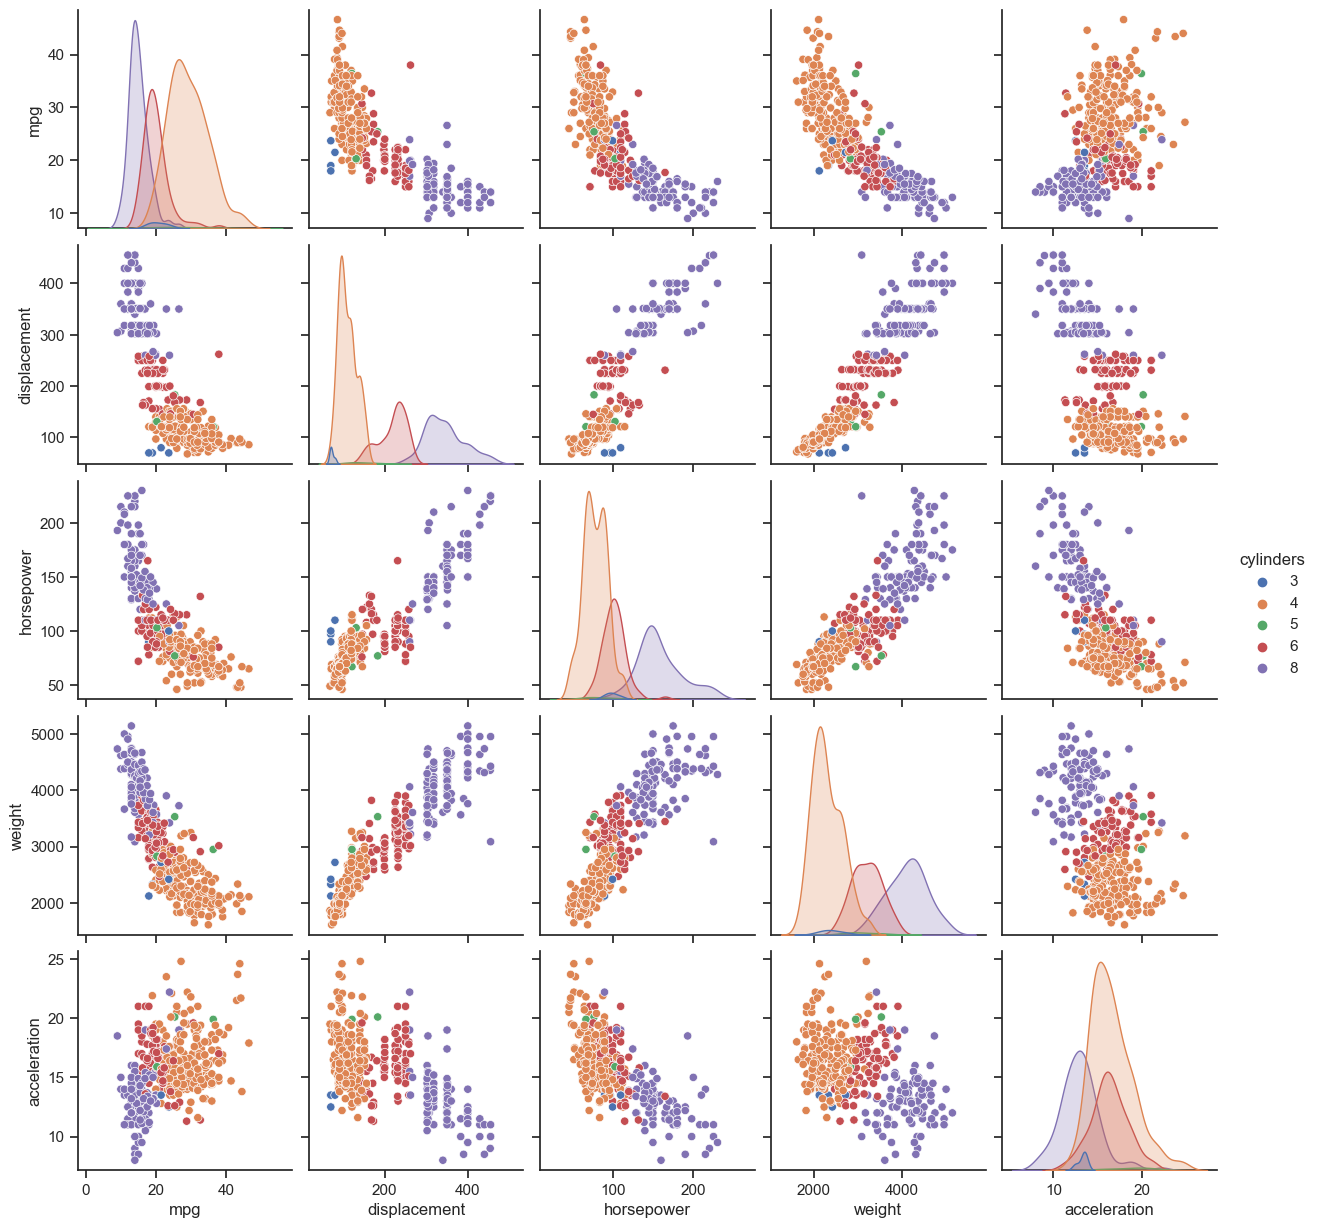

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue='cylinders')


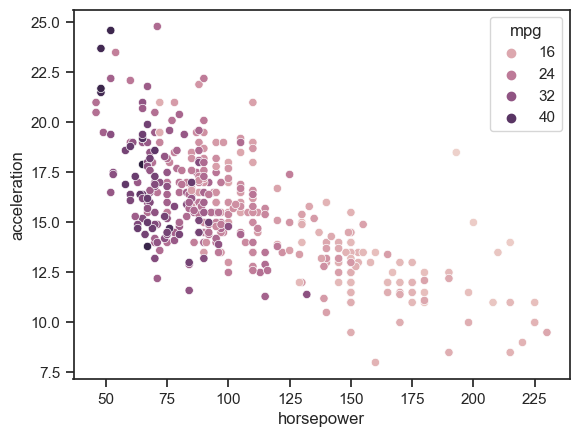

In [120]:
sns.scatterplot(data=df, x='horsepower', y='acceleration', hue='mpg')
plt.show()

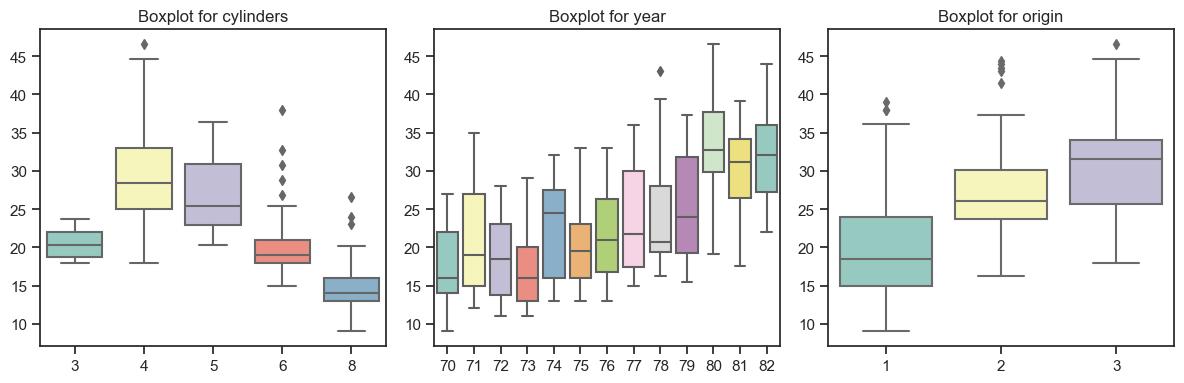

In [121]:
# Set the seaborn theme
sns.set_theme(style='ticks')

# Create a grid with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Iterate over the categorical variables
cat_vars = df.select_dtypes(include='category').columns
for i, var in enumerate(cat_vars):
    # Create a boxplot in the corresponding subplot
    sns.boxplot(data=df, x=var, y='mpg', ax=axes[i], palette='Set3')
    axes[i].set_title(f'Boxplot for {var}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

Normalizing data (didn't help)

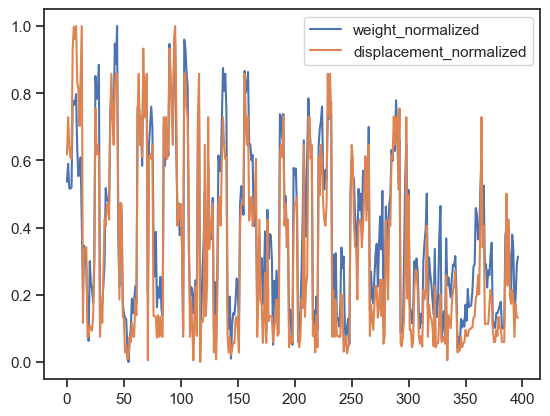

In [122]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Assume df is your DataFrame with the variables 'x' and 'y'

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Normalize the variables
df['weight_normalized'] = scaler.fit_transform(df[['weight']])
df['displacement_normalized'] = scaler.fit_transform(df[['displacement']])

# Plot the normalized variables on the same axis
plt.plot(df['weight_normalized'], label='weight_normalized')
plt.plot(df['displacement_normalized'], label='displacement_normalized')
plt.legend()
plt.show()

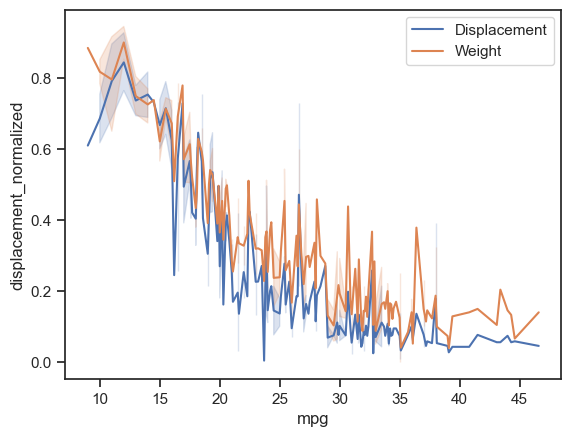

In [123]:
sns.lineplot(data=df, x='mpg', y='displacement_normalized', label='Displacement')
sns.lineplot(data=df, x='mpg', y='weight_normalized', label='Weight')
plt.legend()
plt.show()

Correlation heatmap

/var/folders/z8/cc4272952ys21x5nv8lzwsmm0000gn/T/ipykernel_23906/2457119910.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


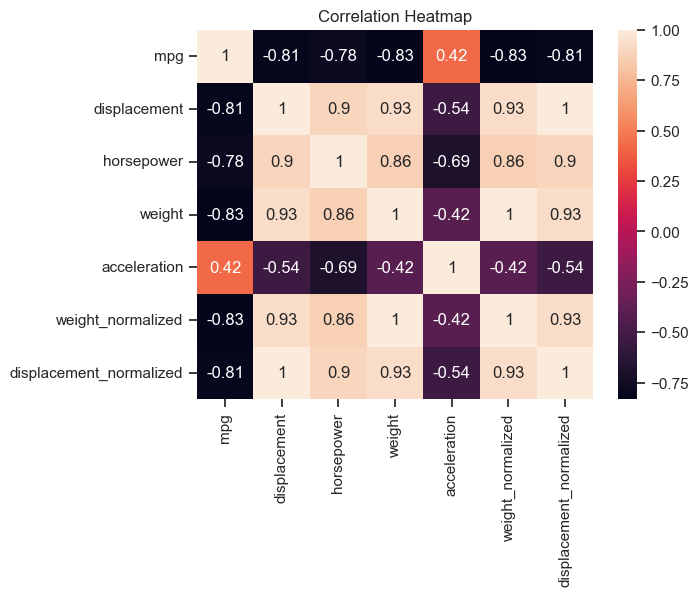

In [124]:
# Assume df is your DataFrame containing the variables of interest

# Calculate the correlation matrix
corr_matrix = df.corr()

# Create the correlation heatmap
sns.heatmap(corr_matrix, annot=True)

# Set plot attributes
plt.title('Correlation Heatmap')
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Show the plot
plt.show()

Hypothesis Testing -> Negative corr bw hp and acc

In [125]:
import scipy.stats as stats

# Assume df is your DataFrame containing the 'hp' and 'acceleration' variables

# Calculate the Pearson correlation coefficient and p-value
corr_coeff, p_value = stats.pearsonr(df['horsepower'], df['acceleration'])

# Print the results
print("Pearson correlation coefficient:", corr_coeff.round(2))
print("p-value:", p_value.round(3))

Pearson correlation coefficient: -0.69
p-value: 0.0
